In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = "/content/drive/MyDrive/automobile/clean_dff.xlsx"
df = pd.read_excel(path)
df.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,11.190476,27,13495,Low,0,1,1,0
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,11.190476,27,16500,Low,0,1,1,0
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,154,5000.0,12.368421,26,16500,Medium,0,1,1,0
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,102,5500.0,9.791667,30,13950,Low,0,1,1,0
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,115,5500.0,13.055556,22,17450,Low,0,1,1,0


Simple Linear Regression.

In [ ]:
#Lets load the modules for linear regression
from sklearn.linear_model import LinearRegression
#Create the linear regression object
model = LinearRegression()
model

LinearRegression()

In [ ]:
X = df[['highway-mpg']]
Y = df['price']
#Fit the linear model using highway-mpg
model.fit(X,Y)

LinearRegression()

In [ ]:
Yhat=model.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [ ]:
print(model.intercept_)
print(model.coef_)

38423.3058581574
[-821.73337832]


In [ ]:
model1 = LinearRegression()
X = df[['engine-size']]
Y = df['price']
model1.fit(X,Y)

LinearRegression()

In [ ]:
Yhat=model1.predict(X)
Yhat[0:5]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

In [ ]:
print(model1.intercept_)
print(model1.coef_)

-7963.338906281042
[166.86001569]


Multiple Linear Regression

In [ ]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
#Fit the linear model
model.fit(Z, df['price'])

LinearRegression()

In [ ]:
print(model.intercept_)
print(model.coef_)

-15811.863767729232
[53.53022809  4.70805253 81.51280006 36.1593925 ]


Regression Plot

In [ ]:
import seaborn as sns

(0.0, 47538.58016118868)

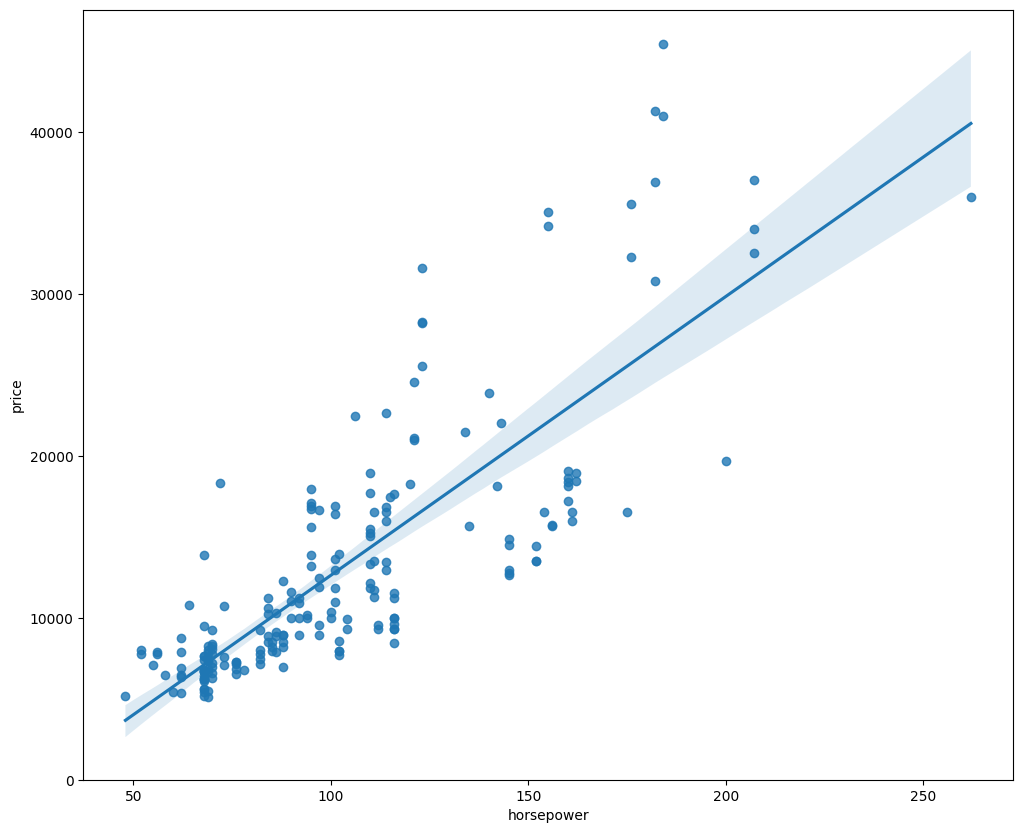

In [ ]:
width=12
height=10
plt.figure(figsize = (width,height))
sns.regplot(x='horsepower',y='price',data=df)
plt.ylim(0,)

(0.0, 47414.1)

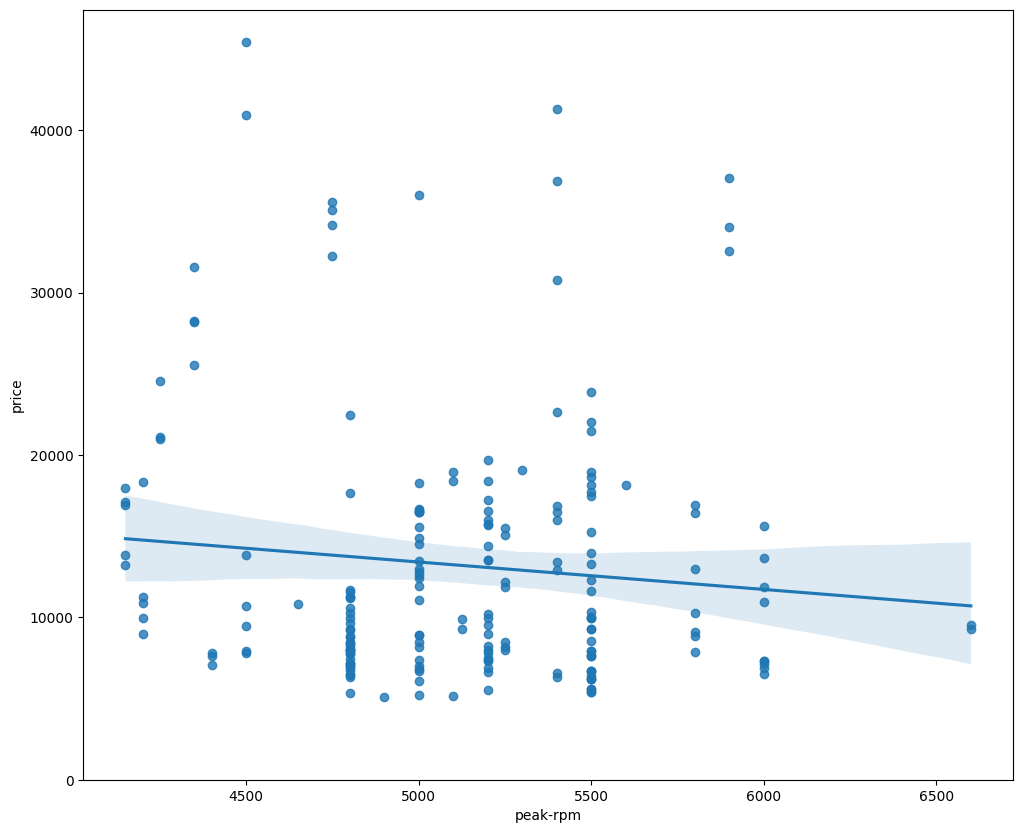

In [ ]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [ ]:
df[['peak-rpm','highway-mpg','price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


Residual Plot

(0.0, 33129.93533408737)

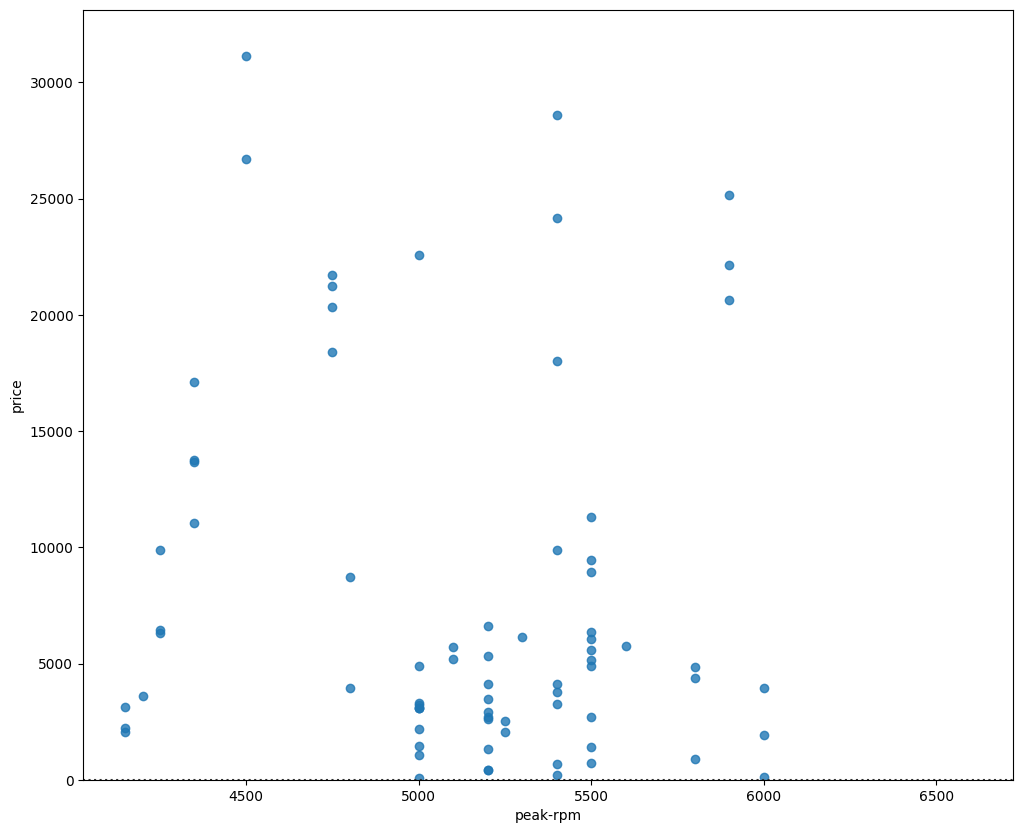

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width,height))
sns.residplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Multiple Linear Regression

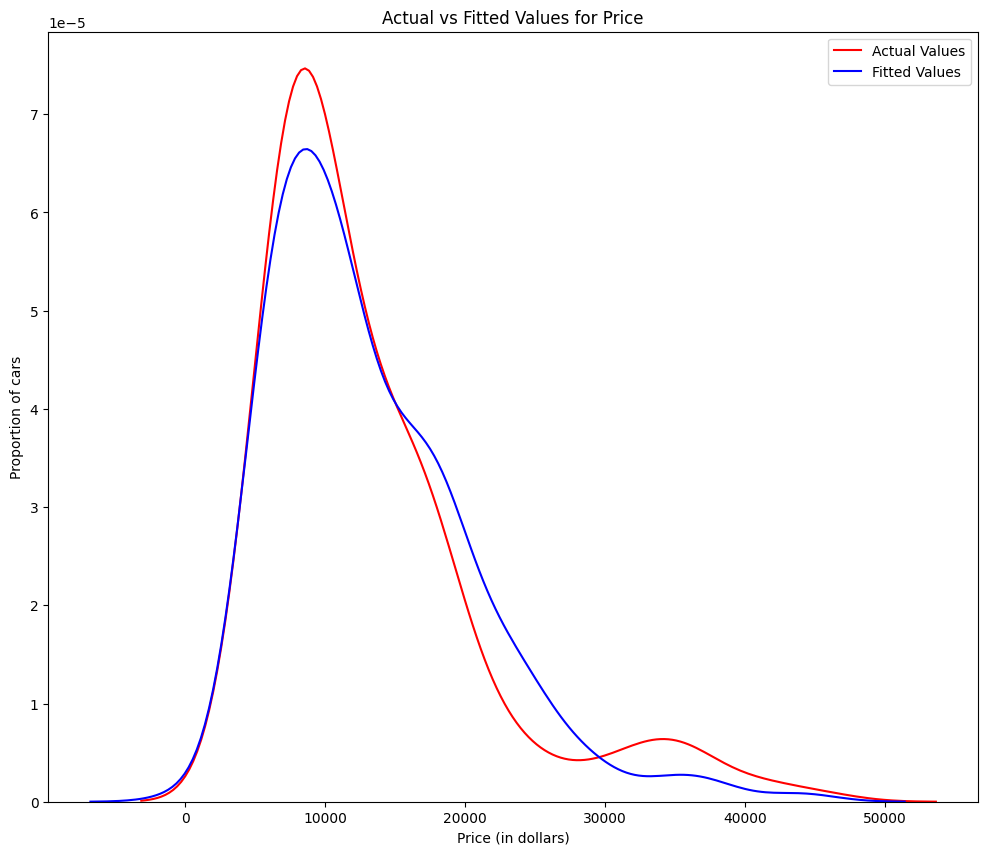

In [ ]:
Yhat = model.predict(Z)
plt.figure(figsize=(width, height))

# Plotting actual values with KDE
sns.kdeplot(df['price'], color="r", label="Actual Values")

# Plotting fitted values with KDE
sns.kdeplot(Yhat, color="b", label="Fitted Values")

plt.title("Actual vs Fitted Values for Price")
plt.xlabel("Price (in dollars)")
plt.ylabel("Proportion of cars")
plt.legend()  # Adding a legend to differentiate the two distributions

plt.show()



Polynomial Regression and Pipelines

In [ ]:
#We will use the following function to plot the data:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [ ]:
x = df['highway-mpg']
y = df['price']
#Let's fit the polynomial using the function polyfit,then use the function to display the polynomial function.
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


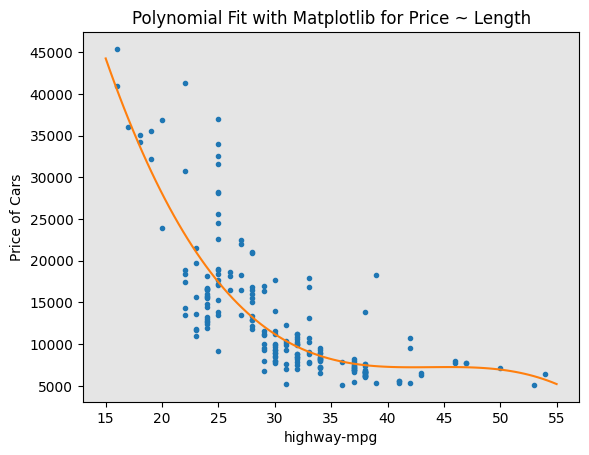

In [ ]:
PlotPolly(p, x, y, 'highway-mpg')

In [ ]:
#import the module
from sklearn.preprocessing import PolynomialFeatures
#create a PolynomialFeatures object of degree 2
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [ ]:
Z_pr=pr.fit_transform(Z)


In [ ]:
Z.shape

(201, 4)

In [ ]:
Z_pr.shape

(201, 15)

Pipeline

In [ ]:
#Use the module Pipeline to create a pipeline and also use StandardScaler as a step in our pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
#create the pipeline by creating a list of tuples including the name of the model/estimator & its corresponding constructor.
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [ ]:
#Input the list as an argument to the pipeline constructor
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [ ]:
#Normalize the data and perform a transform and fit the model simultaneously
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [ ]:
#Normalize the data, perform a transform and produce a prediction  simultaneously
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.93329646, 13102.93329646, 18226.43450275, 10391.09183955])

In [ ]:
Input = [('scale',StandardScaler()),('model',LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(Z,y)
ypipe = pipe.predict(Z)
ypipe[0:10]

array([13699.07700462, 13699.07700462, 19052.71346719, 10620.61524404,
       15520.90025344, 13869.27463809, 15455.88834114, 15973.77411958,
       17612.7829335 , 10722.47987021])

Measures for In-Sample Evaluation

Model 1: Simple Linear Regression

In [ ]:
#highway_mpg_fit
model.fit(X, Y)
# Find the R^2
model.score(X, Y)

0.7609686443622008

calculate the MSE

In [ ]:
#We can predict the output i.e., "yhat" using the predict method, where X is the input variable:
Yhat=model.predict(X)
Yhat[0:4]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408])

In [ ]:
#import the function mean_squared_error from the module metrics
from sklearn.metrics import mean_squared_error
#compare the predicted results with the actual results
mse = mean_squared_error(df['price'], Yhat)
mse

15021126.025174143

Model 2: Multiple Linear Regression

 calculate the R^2

In [ ]:
# fit the model
model.fit(Z, df['price'])
# Find the R^2
model.score(Z, df['price'])

0.8093732522175299

calculate the MSE

In [ ]:
# Produce a prediction
Y_predict_multifit = model.predict(Z)
# Compare the predicted results with the actual results
# The mean square error of price and predicted value using multifit is:
mean_squared_error(df['price'], Y_predict_multifit)

11979300.34981888

Model 3: Polynomial Fit

calculate the R^2

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r_squared = r2_score(y, p(x))
r_squared

0.674194666390652

MSE

In [ ]:
mean_squared_error(df['price'], p(x))

20474146.426361218

Prediction and Decision Making

Prediction

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Create a new input

In [ ]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

Fit the model

In [ ]:
model.fit(X, Y)
model


LinearRegression()

Produce a prediction

In [ ]:
yhat=model.predict(new_input)
yhat[0:5]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-7796.47889059, -7629.6188749 , -7462.75885921, -7295.89884352,
       -7129.03882782])

Plot the data

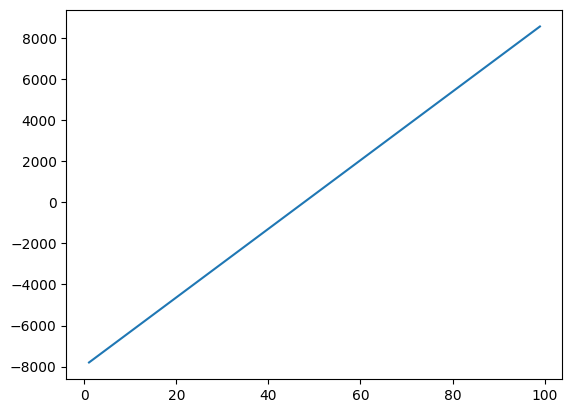

In [ ]:
plt.plot(new_input, yhat)
plt.show()


Decision Making: Determining a Good Model Fit
Model with the higher R-squared value is a better fit for the data.

Model with the smallest MSE value is a better fit for the data.

Let's take a look at the values for the different models.
Simple Linear Regression : Using Highway-mpg as a Predictor Variable of Price.

R-squared: 0.49659118843391759
MSE: 3.16 x10^7
Multiple Linear Regression : Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.

R-squared: 0.80896354913783497
MSE: 1.2 x10^7
Polynomial Fit : Using Highway-mpg as a Predictor Variable of Price.

R-squared: 0.6741946663906514
MSE: 2.05 x 10^7

We can conclude that the MLR model is the best model